# House Prices Prediction 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
dataset_path = "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
data = pd.read_csv(dataset_path)


In [3]:
print(data.head())
print(data.info())
print(data.describe())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
# Fill numerical missing values with median
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill categorical missing values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


In [5]:
data = pd.get_dummies(data, drop_first=True)


In [6]:
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)


In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 28048510241.00069
Mean Squared Error (MSE): 2.2964385395329875e+23
Root Mean Squared Error (RMSE): 479211700559.6783
R² Score: -29939255222041.78


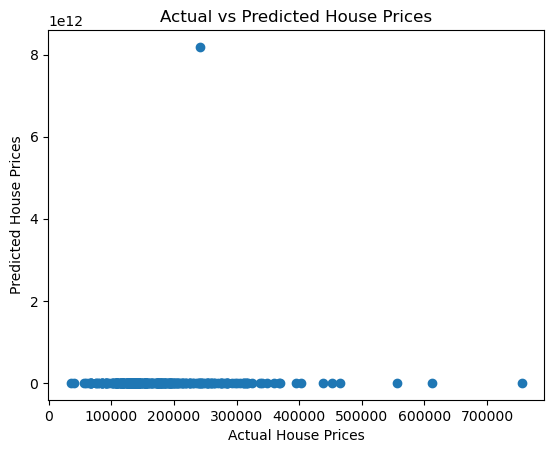

In [12]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


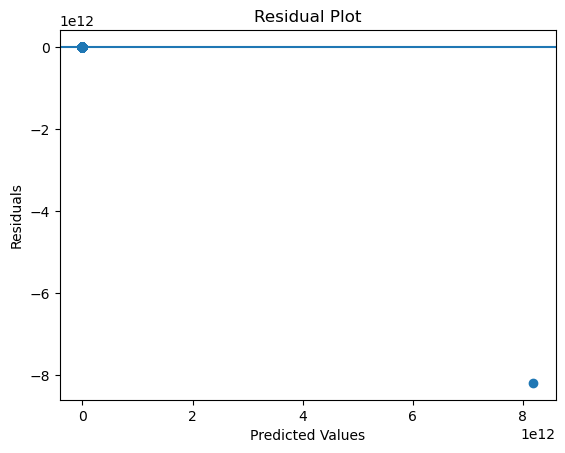

In [13]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [14]:
coefficients = pd.DataFrame(
    model.coef_,
    index=data.drop("SalePrice", axis=1).columns,
    columns=["Coefficient"]
)

coefficients.sort_values(by="Coefficient", ascending=False).head(10)


,Coefficient
2ndFlrSF,3.594619e+15
1stFlrSF,3.162062e+15
TotalBsmtSF,2.185748e+15
LowQualFinSF,3.915999e+14
Exterior2nd_CBlock,2.175833e+14
RoofMatl_Membran,8.188774e+12
RoofMatl_CompShg,8.298281e+04
RoofMatl_Tar&Grv,5.757320e+04
RoofMatl_WdShngl,3.903938e+04
RoofMatl_WdShake,3.307150e+04


In [15]:
coefficients = pd.DataFrame(
    model.coef_,
    index=data.drop("SalePrice", axis=1).columns,
    columns=["Coefficient"]
)

coefficients.sort_values(by="Coefficient", ascending=False).head(10)


,Coefficient
2ndFlrSF,3.594619e+15
1stFlrSF,3.162062e+15
TotalBsmtSF,2.185748e+15
LowQualFinSF,3.915999e+14
Exterior2nd_CBlock,2.175833e+14
RoofMatl_Membran,8.188774e+12
RoofMatl_CompShg,8.298281e+04
RoofMatl_Tar&Grv,5.757320e+04
RoofMatl_WdShngl,3.903938e+04
RoofMatl_WdShake,3.307150e+04
